#  RBM Analysis

Example of the distribution of initial and final Free Energies for a vanilla RBM


In [1]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

/Users/charlesmartin14/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from sklearn.datasets import load_digits
from sklearn.utils.validation import assert_all_finite
from scipy.sparse import csc_matrix, csr_matrix, lil_matrix
from sklearn.utils.testing import (assert_almost_equal, assert_array_equal,
                                   assert_true)


from sklearn.preprocessing import Binarizer
np.seterr(all='warn')

Xdigits = load_digits().data
Xdigits -= Xdigits.min()
Xdigits /= Xdigits.max()

b = Binarizer(threshold=0.001, copy=True)
Xdigits = b.fit_transform(Xdigits)
print Xdigits.shape

(1797, 64)


## Anaylsis of RBM stochastic properties

### We see the variations are difficult to unit test, and, really, to compare 

- variations in norms of W, hb, vb, FE, samples, etc
- study per epoch, and after N epochs


In [5]:
from sklearn.neural_network import BernoulliRBM
X = Xdigits.copy()


In [11]:
def one_epoch_Brbm(X):
    rbm1 = BernoulliRBM(n_components=64, batch_size=20,
                  learning_rate=0.005, verbose=False, n_iter=1)
    rbm1.fit(X);
    return rbm1

ws1, vbs1, hbs1, scores1 = [], [], [], []
for i in range(1000):
    rbm1 = one_epoch_Brbm(X)
    ws1.append(np.linalg.norm(rbm1.components_,ord=2))
    vbs1.append(np.linalg.norm(rbm1.intercept_visible_,ord=2))
    hbs1.append(np.linalg.norm(rbm1.intercept_hidden_,ord=2))
    scores1.append(np.average(rbm1.score_samples(X)))
    print i,

 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 2

In [12]:
def twenty_epochs_Brbm(X):
    rbm20 = BernoulliRBM(n_components=64, batch_size=20,
                  learning_rate=0.005, verbose=False, n_iter=20)
    rbm20.fit(X);
    return rbm20

ws20, vbs20, hbs20, scores20 = [], [], [], []
X = Xdigits.copy()

for i in range(1000):
    rbm20 = twenty_epochs_Brbm(X)
    ws20.append(np.linalg.norm(rbm20.components_,ord=2))
    vbs20.append(np.linalg.norm(rbm20.intercept_visible_,ord=2))
    hbs20.append(np.linalg.norm(rbm20.intercept_hidden_,ord=2))
    scores20.append(np.average(rbm20.score_samples(X)))
    print i,

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

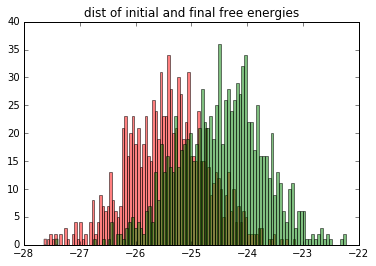

In [13]:
plt.hist(scores1,100, color='r', alpha = 0.5);
plt.hist(scores20,100, color='g', alpha = 0.5);


plt.title("dist of initial and final free energies")

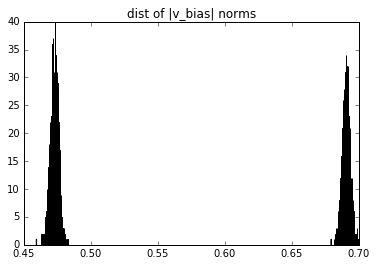

In [18]:
plt.hist(vbs1,100, color='red');
plt.hist(vbs20,100, color='green');

plt.title("dist of |v_bias| norms")

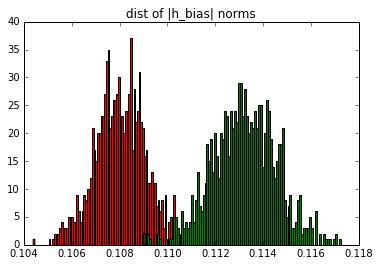

In [19]:
plt.hist(hbs1,100, color='red');
plt.hist(hbs20,100, color='green');

plt.title("dist of |h_bias| norms")